# EDA for Football Data from Transfermarkt
- Kaggle Data URL

    - https://www.kaggle.com/datasets/davidcariboo/player-scores

## 데이터 설명
- Transfermarkt 웹사이트에서 스크레이핑한 각종 축구 데이터 (매주 한번 파일 업데이트)
    - 주요 대회 시즌별 60,000개 이상의 경기
    - 모든 대회의 400개 이상의 클럽들
    - 30,000 이상의 선수들
    - 400,000개 이상의 선수 가치 기록
    - 1,200,000개 이상의 선수 출전 기록

- `csv` 파일 설명
    - `apperances` : 선수 출장 기록
    - `club_games` : 클럽별 경기 홈팀, 어웨이팀 정보
    - `clubs` : 리그별 속해 있는 클럽
    - `competitions` : 대회 정보
    - `game_events` : 경기별 이벤트 정보 (카드, 득점, 어시스트 등)
    - `game_lineups` : 경기별 선수의 선발, 교체 명단 등재 여부
    - `games` : 경기에 대한 정보 (시즌, 라운드, 홈팀, 어웨이팀, 순위)
    - `player_valuations` : Transfermarkt 웹사이트에서 매긴 선수의 가치
    - `players` : 선수에 대한 세부 정보

- 데이터베이스 스키마
    <img src="https://raw.githubusercontent.com/dcaribou/transfermarkt-datasets/master/resources/diagram.svg?sanitize=true" width="1700">

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from datetime import timedelta
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 경로
path = "C:/Users/aryij/Documents/DataStudy/DAStudy-sat/Tek/football-data-from-transfermarkt/data/df_preprocessed.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,player_name,last_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,date_of_birth,sub_position,current_club_name,highest_market_value_in_eur,market_value_per_season,country_of_citizenship,foot,height_in_cm
0,Aaron Connolly,2019,0,0,3,2,1261,24,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,4000000.0,Ireland,right,174.0
1,Aaron Connolly,2020,0,0,2,1,791,17,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,7000000.0,Ireland,right,174.0
2,Aaron Connolly,2021,0,0,0,0,155,4,premier-league,2000-01-28,Centre-Forward,Brighton and Hove Albion Football Club,7000000.0,6000000.0,Ireland,right,174.0
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,1989-12-15,Left-Back,West Ham United Football Club,12000000.0,5000000.0,England,left,170.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17323 entries, 0 to 17322
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_name                  17323 non-null  object 
 1   last_season                  17323 non-null  int64  
 2   yellow_cards                 17323 non-null  int64  
 3   red_cards                    17323 non-null  int64  
 4   goals                        17323 non-null  int64  
 5   assists                      17323 non-null  int64  
 6   minutes_played               17323 non-null  int64  
 7   total_apps                   17323 non-null  int64  
 8   competition_code             17323 non-null  object 
 9   date_of_birth                17323 non-null  object 
 10  sub_position                 17323 non-null  object 
 11  current_club_name            17323 non-null  object 
 12  highest_market_value_in_eur  17323 non-null  float64
 13  market_value_per

In [26]:
# date_of_birth 컬럼 타입 datetime으로 변경
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"], format='%Y-%m-%d')

# last_season 컬럼 타입 object로 변경
df["last_season"] = df["last_season"].astype(str)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17323 entries, 0 to 17322
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_name                  17323 non-null  object        
 1   last_season                  17323 non-null  object        
 2   yellow_cards                 17323 non-null  int64         
 3   red_cards                    17323 non-null  int64         
 4   goals                        17323 non-null  int64         
 5   assists                      17323 non-null  int64         
 6   minutes_played               17323 non-null  int64         
 7   total_apps                   17323 non-null  int64         
 8   competition_code             17323 non-null  object        
 9   date_of_birth                17323 non-null  datetime64[ns]
 10  sub_position                 17323 non-null  object        
 11  current_club_name            17323 non-nu

### `.describe()` 확인

In [28]:
df.describe()

,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,date_of_birth,highest_market_value_in_eur,market_value_per_season,height_in_cm
count,17323.000000,17323.000000,17323.000000,17323.000000,17323.000000,17323.000000,17323,1.732300e+04,1.732300e+04,17323.000000
mean,2.683658,0.071119,1.683253,1.295388,1213.938463,18.297639,1995-08-15 16:33:41.635975296,1.647155e+07,9.199924e+06,182.378803
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1977-09-13 00:00:00,5.000000e+04,2.500000e+04,162.000000
25%,0.000000,0.000000,0.000000,0.000000,360.000000,9.000000,1992-05-21 12:00:00,3.000000e+06,1.200000e+06,178.000000
50%,2.000000,0.000000,0.000000,0.000000,1103.000000,19.000000,1995-12-19 00:00:00,9.000000e+06,3.500000e+06,183.000000
75%,4.000000,0.000000,2.000000,2.000000,1930.500000,27.000000,1999-02-20 00:00:00,2.200000e+07,1.100000e+07,187.000000
max,18.000000,3.000000,41.000000,22.000000,3420.000000,39.000000,2007-10-02 00:00:00,2.000000e+08,1.800000e+08,206.000000
std,2.705095,0.271876,3.139182,2.074714,924.063409,10.826591,NaN,2.132134e+07,1.449165e+07,6.634182


In [29]:
df.describe(include="object")

,player_name,last_season,competition_code,sub_position,current_club_name,country_of_citizenship,foot
count,17323,17323,17323,17323,17323,17323,17323
unique,6052,5,6,13,281,125,3
top,Paulinho,2020,liga-portugal-bwin,Centre-Back,Sporting Clube de Portugal,Spain,right
freq,192,3701,3226,3104,189,2157,12327


## 이상치 확인
- `boxplot` 그려본다

In [33]:
# num_cols = df.select_dtypes(include="number").columns.drop("last_season").tolist()
num_cols = df.select_dtypes(include="number").columns.tolist()

print(num_cols)
print(len(num_cols))

['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'total_apps', 'highest_market_value_in_eur', 'market_value_per_season', 'height_in_cm']
9


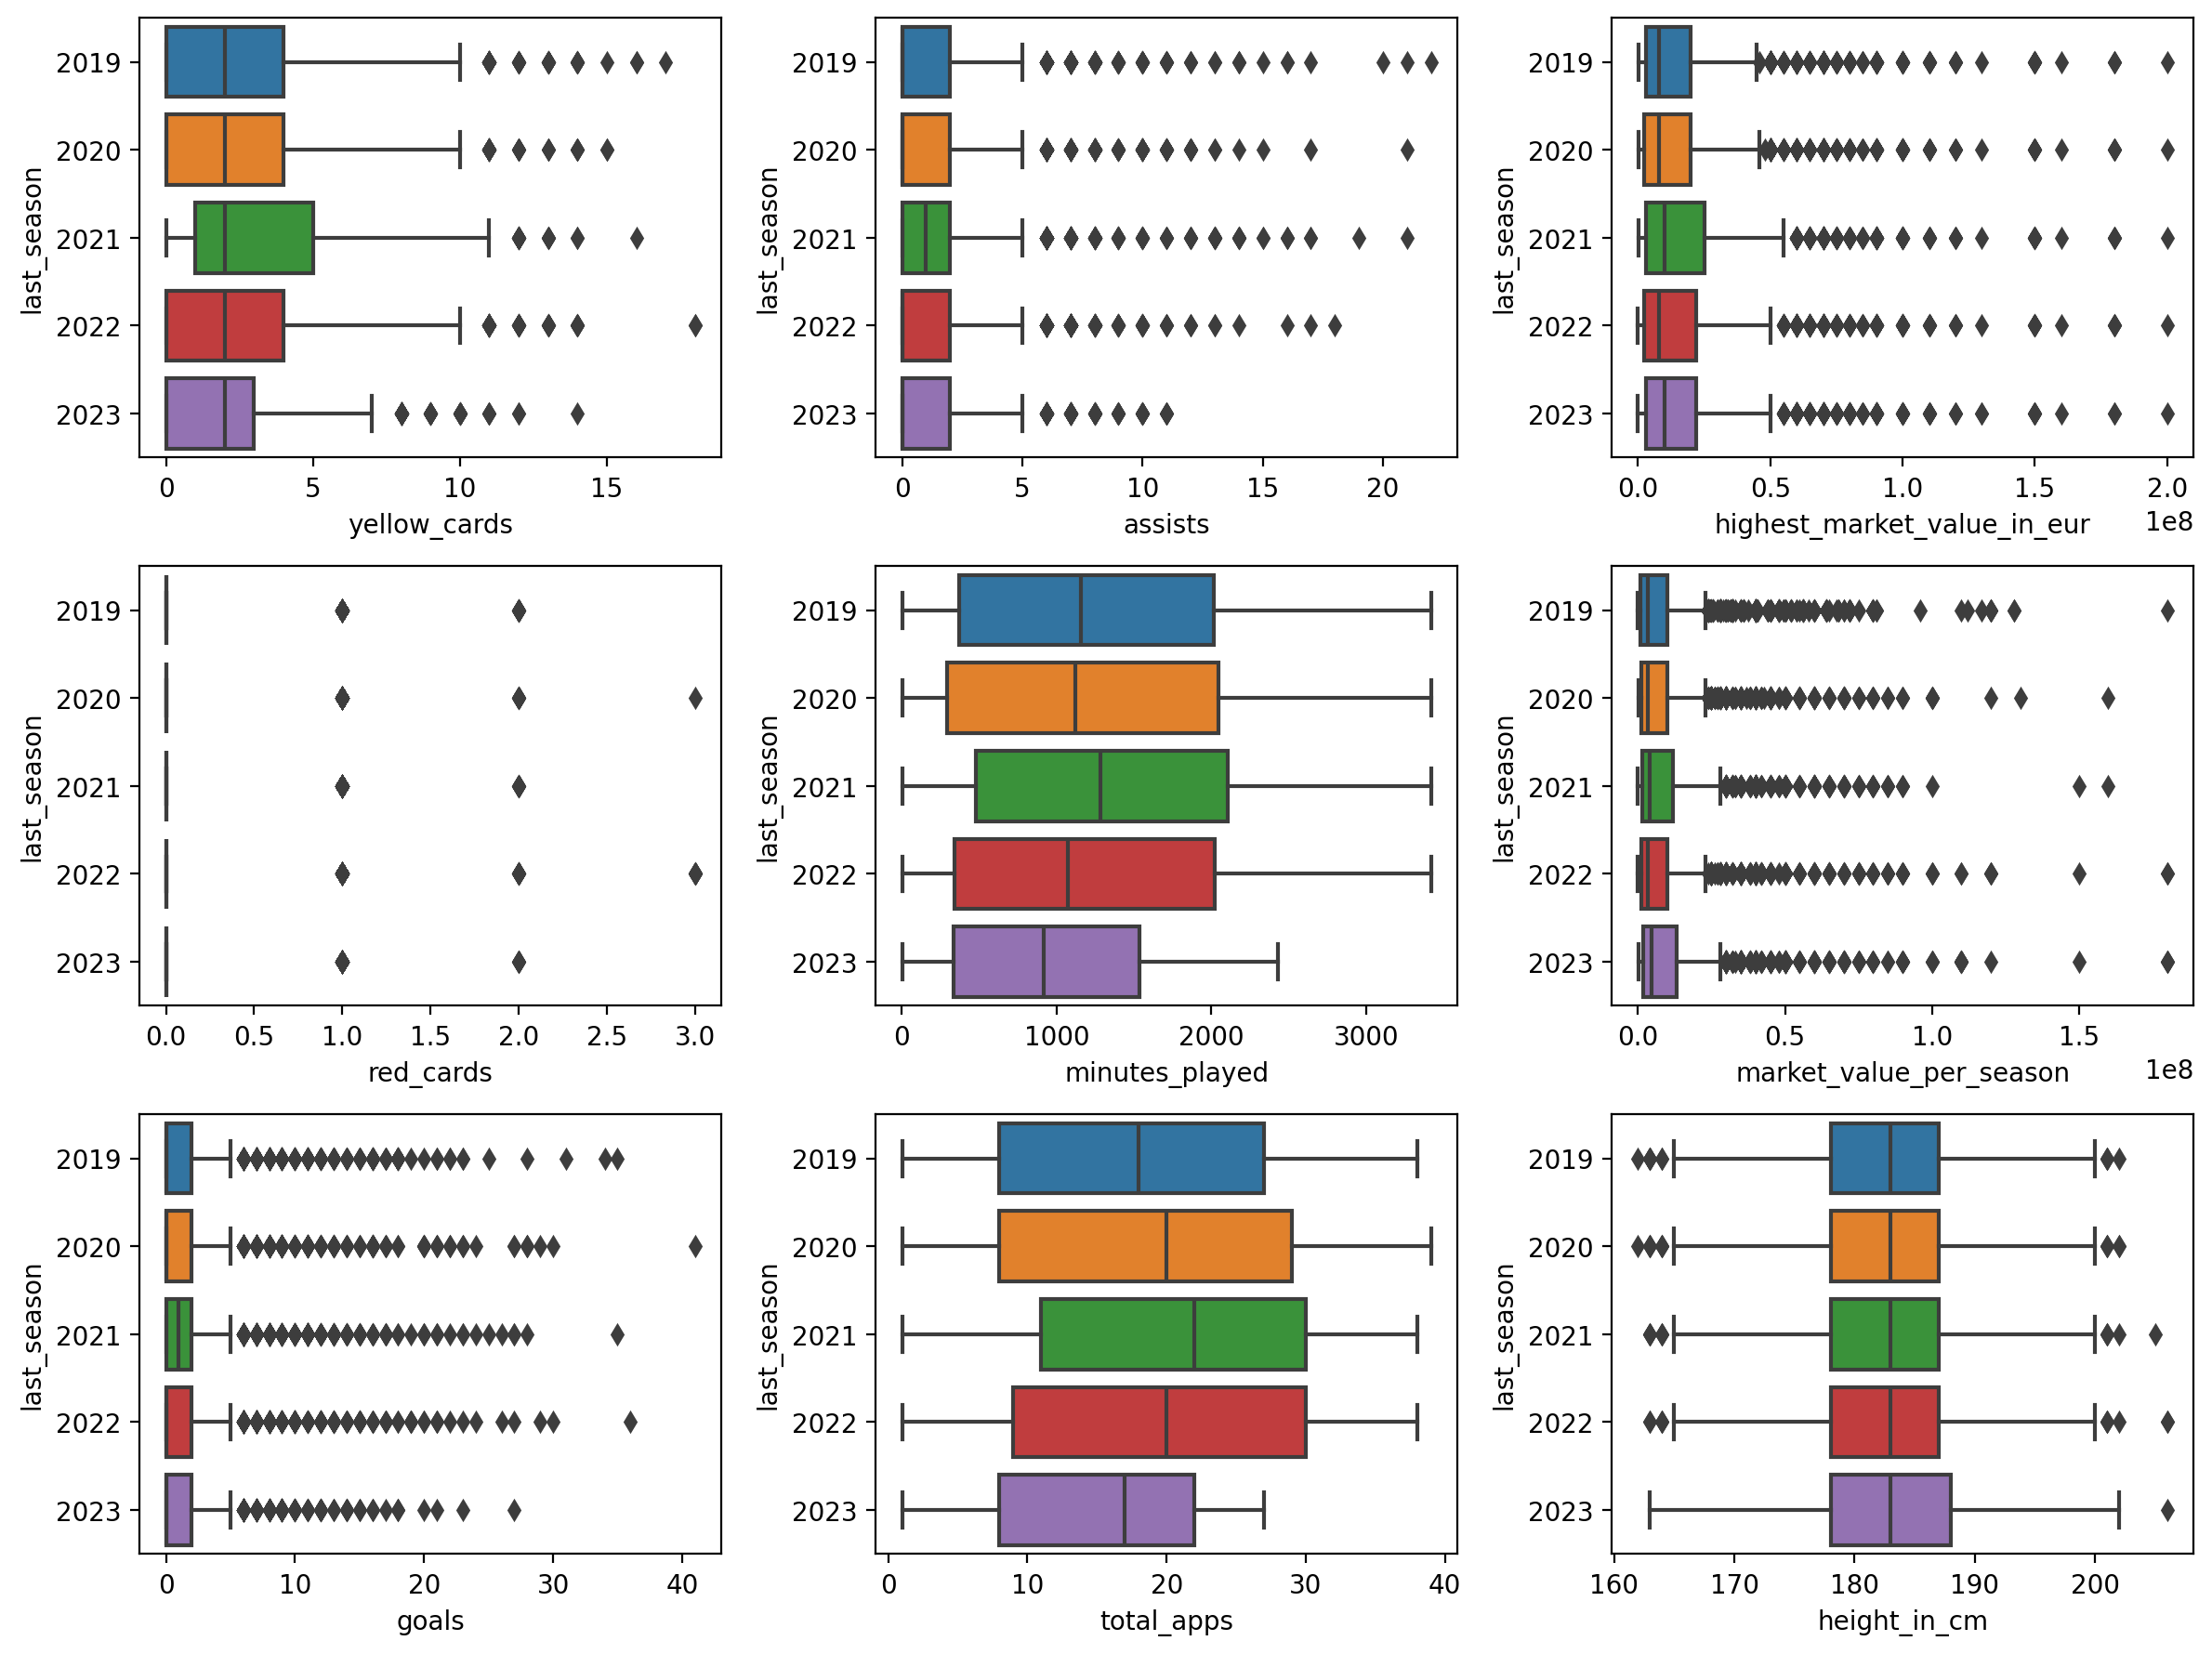

In [42]:
# subplot 생성
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 9))

# flatten()을 통해 axes를 1차원 array로 펴줘야 한다
axes = axes.T.flatten()

for col, ax in zip(num_cols, axes):
    sns.boxplot(data=df, x=col, ax=ax, y="last_season")
    # sns.stripplot(data=df, x=col, ax=ax, y="last_season", hue="foot")

fig.tight_layout()
plt.show()

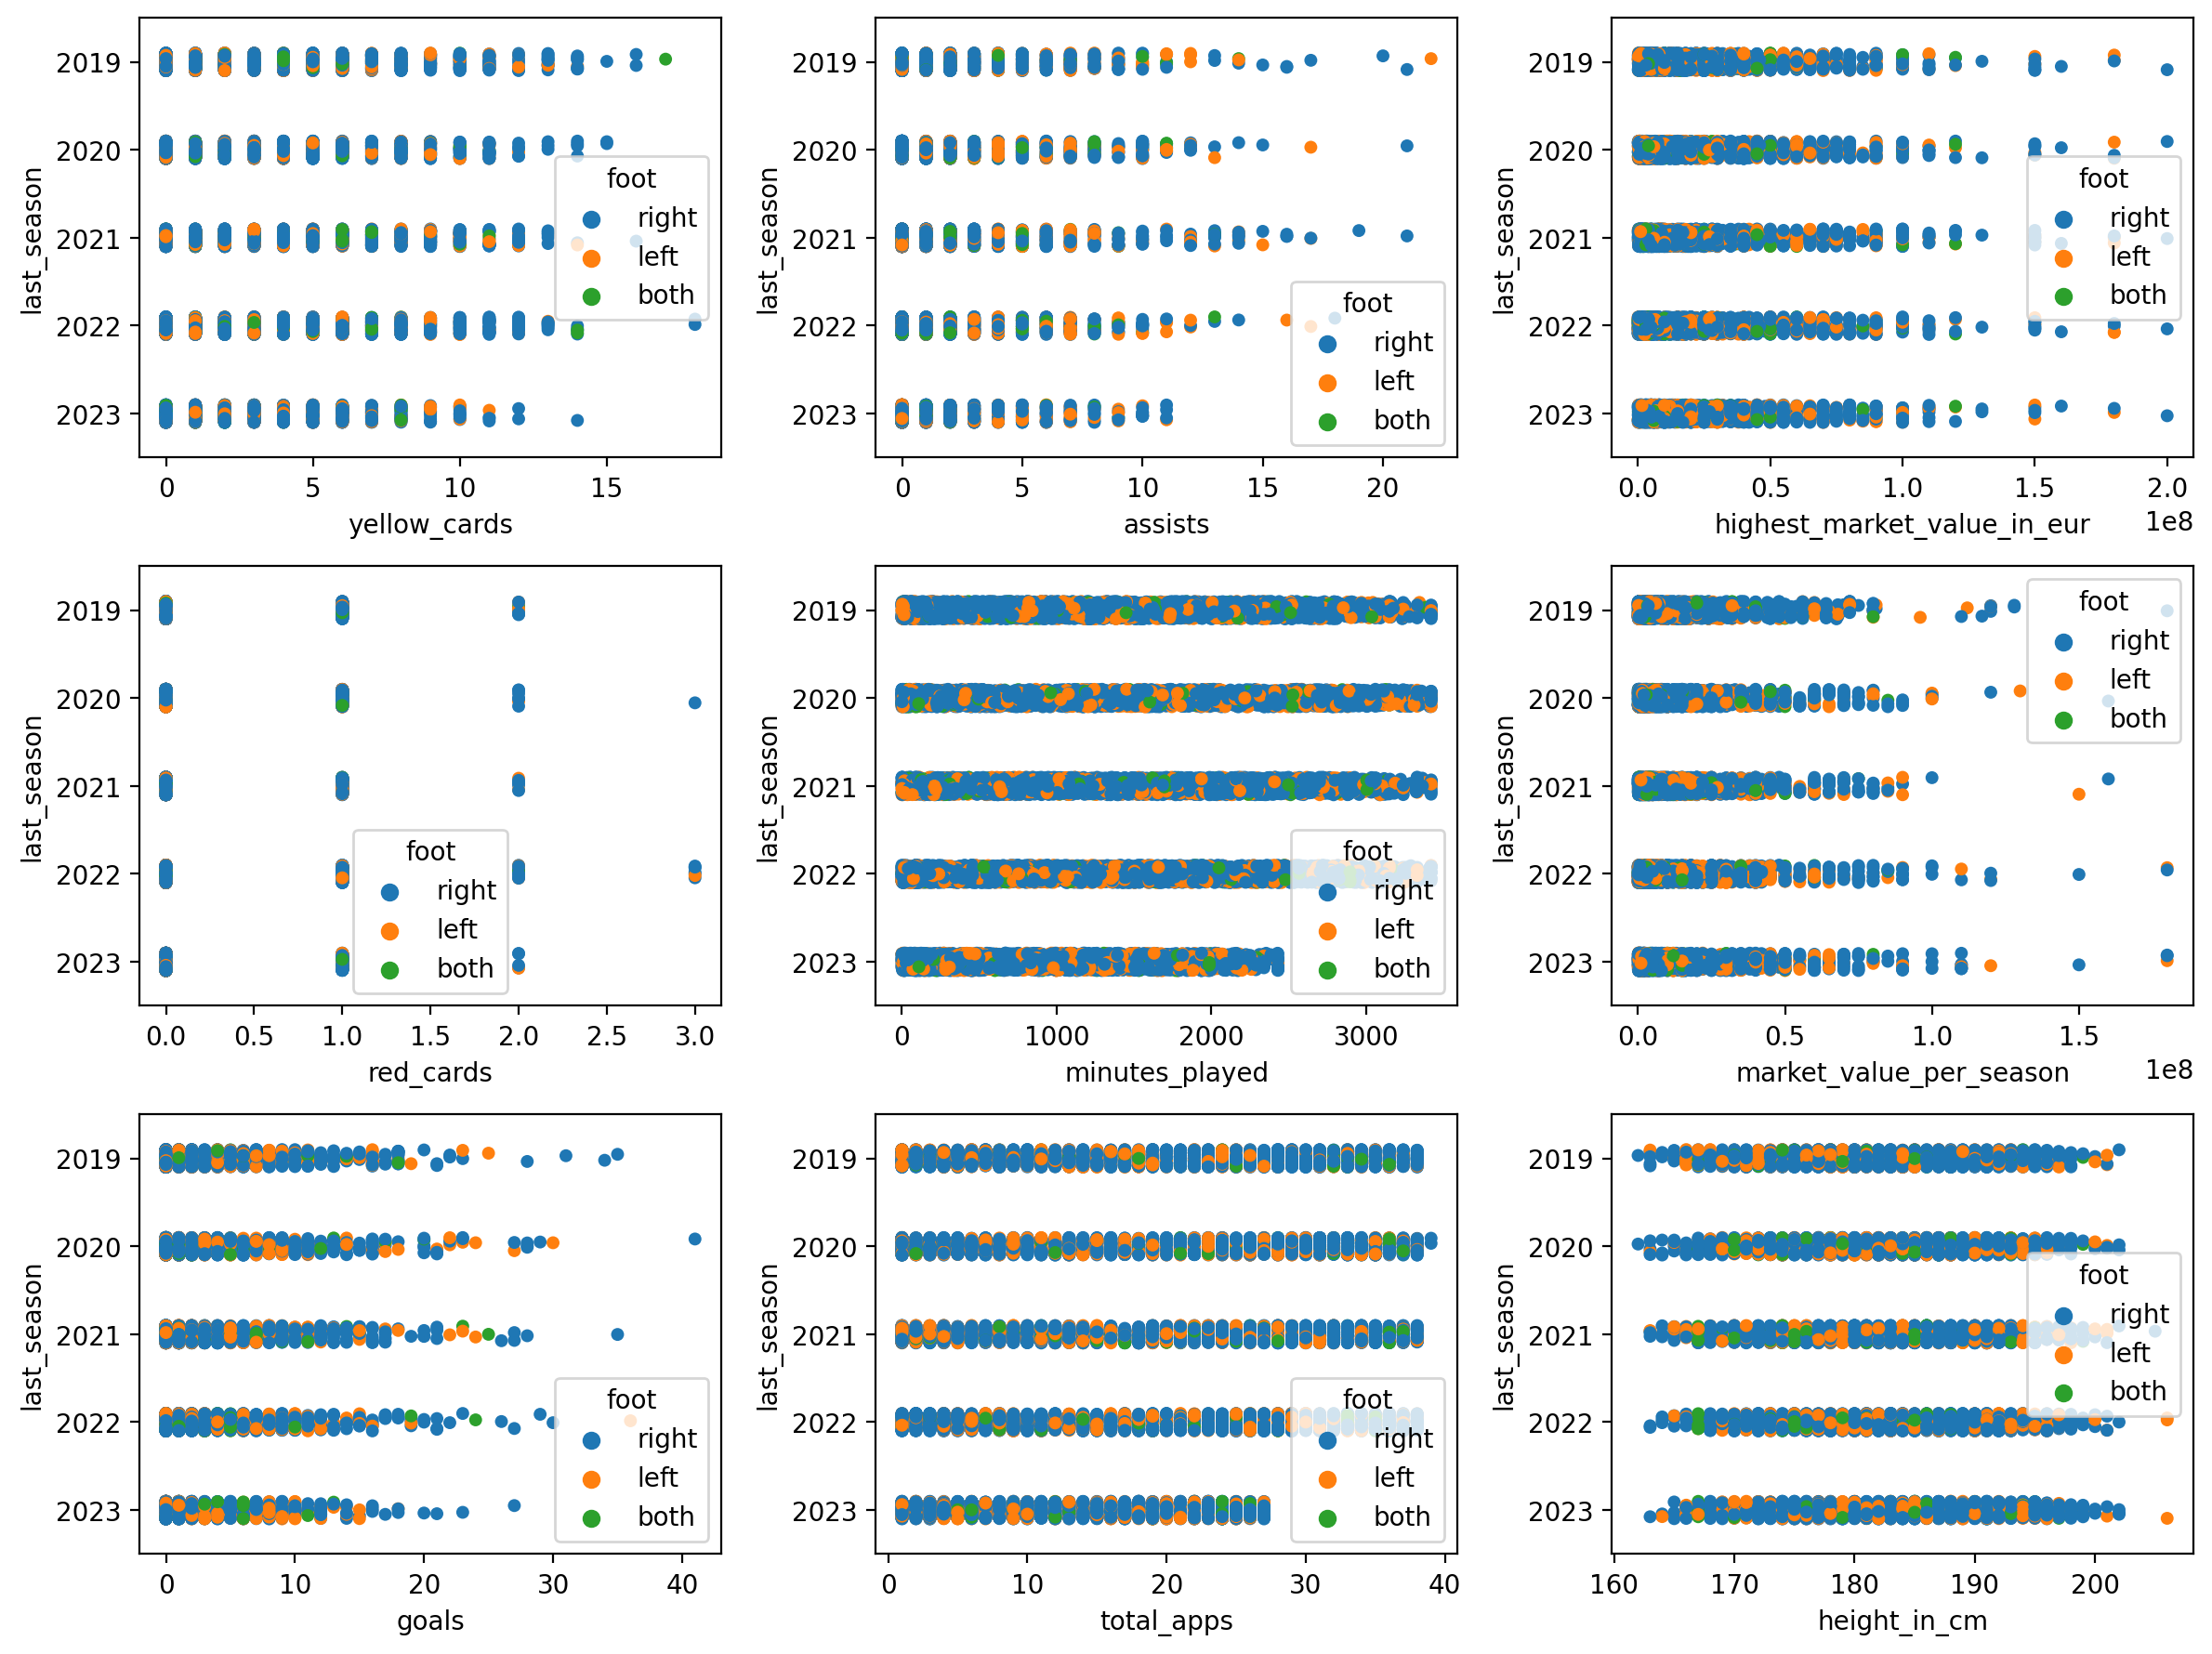

In [43]:
# subplot 생성
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 9))

# flatten()을 통해 axes를 1차원 array로 펴줘야 한다
axes = axes.T.flatten()

for col, ax in zip(num_cols, axes):
    # sns.boxplot(data=df, x=col, ax=ax, hue="last_season")
    sns.stripplot(data=df, x=col, ax=ax, y="last_season", hue="foot")

fig.tight_layout()
plt.show()